## Imports

In [2]:
import util

import convokit
from convokit import Corpus
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline

## Corpus variables setup

In [134]:
# corpus variable -> get from saved path
data_path_remote = '/nethome/dkwon49/.convokit/saved-corpora/subreddit-travel-del-rem'
corpus = Corpus(data_path_remote)

In [5]:
# lambda filtering functions
filter_func = lambda utt: utt.speaker.id + ": " + utt.text
integrity_func = lambda conv: conv.check_integrity(verbose=False)

In [95]:
# filter out non-complete conversations. this can be done using the check_integrity function.
# NOTE: THIS HAS ALREADY BEEN RUN
corpus.filter_conversations_by(integrity_func)

In [6]:
# get conversation lengths
conv_lengths = util.get_conv_lengths(corpus)

## General statistics

In [52]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [7]:
# some stats
print("original corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

original corpus
mean: 4.132827776540185, std: 14.293929274520798
Number of Speakers: 365212
Number of Utterances: 2671526
Number of Conversations: 646416


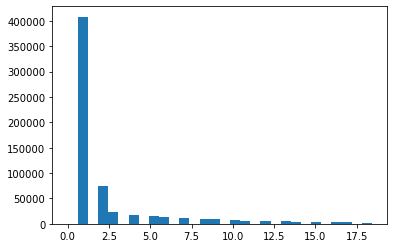

In [47]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=0, high=mean+std)

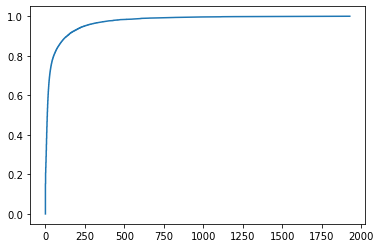

In [49]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths)

In [9]:
# number of total [deleted] utterances
print(util.num_deleted_utterances(corpus))

140680


In [56]:
# number of [deleted] conversations
deleted_conv_count, deleted_conv_lengths = util.num_deleted_convs(corpus)
print(deleted_conv_count)

87503


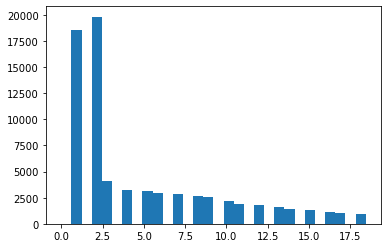

In [60]:
# plot histogram for deleted conv lengths
deleted_mean, deleted_std = util.mean_std(conv_lengths)
util.plot_conv_lengths_histogram(deleted_conv_lengths, low=0, high=deleted_mean+deleted_std)

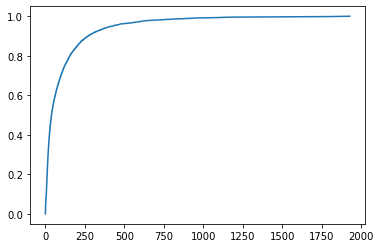

In [58]:
# we see that the deleted conversaton lengths are pretty similarly
# distributed as regular lengths, so we shoudl be able to omit these
# lengths from the corpus
util.plot_conv_lengths_cdf(deleted_conv_lengths)

In [53]:
# number of root [deleted] utterances
deleted_root_utt, indexes = util.num_deleted_root_utterances(corpus)
print(deleted_root_utt)

28571


In [28]:
# find the mean length of conversations with root [deleted] utterances

count = 0
for i in range(len(indexes)):
    count += conv_lengths[indexes[i]]

count /= len(indexes)
print(count)

3.270729060935914


In [31]:
# number of conversations with length 1 that are deleted

def len_1_conv_deleted(corpus):
    count = 0
    for conv in corpus.iter_conversations():
        if len(conv.get_utterance_ids()) == 1:
            for utt in conv.iter_utterances():
                if utt.text == "[deleted]":
                    count += 1
    return count

print(len_1_conv_deleted(corpus))

18535


In [29]:
# number of conversations with length 1
print(util.num_convs_between(conv_lengths, 1, 1))

407992


## Conversation '[deleted]'/'[removed]'filtering

In [114]:
# Filter out of this corpus all conversations with a "[deleted]" utterance
def deleted_filter_func(conv):
    '''
    The lambda function used to filter the corpus. We will return
    False if the conversation has a '[deleted]' utterance, True
    otherwise
    '''
    for utt in conv.iter_utterances():
        if utt.text == '[deleted]' or utt.text == '[removed]':
            return False
    
    return True

In [115]:
# filter / augment the corpus
corpus.filter_conversations_by(deleted_filter_func)

In [116]:
# save this version of the corpus
deleted_corpus_name = "subreddit-travel-del-rem"
corpus.dump(deleted_corpus_name)

In [92]:
reload(util)

<module 'util' from '/home/dkwon49/reddit-summarization/data/util.py'>

In [117]:
conv_lengths = util.get_conv_lengths(corpus)

In [118]:
# some stats
print("deleted corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

deleted corpus
mean: 2.640203393670379, std: 4.401356646346785
Number of Speakers: 235966
Number of Utterances: 1258614
Number of Conversations: 476711


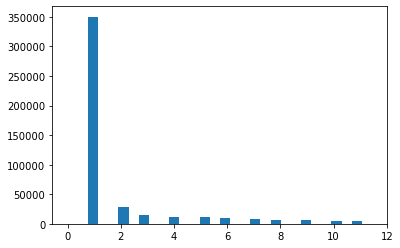

In [122]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=0, high=mean+2*std)

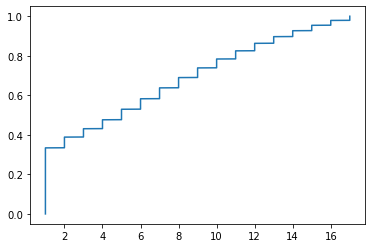

In [123]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths, low=0, high=17)

In [119]:
# number of conversations between length x and y
print(util.num_convs_between(conv_lengths, 4, 7))

40558


In [91]:
util.print_conversation_complete(corpus.random_conversation())

travelhot: 


In [121]:
print(util.num_removed_convs(corpus)[0])
print(util.num_deleted_convs(corpus)[0])

0
0


## Conversation length filtering

In [127]:
# Filter out of this corpus all conversations <= 2 utterance's
def length_filter_func(conv):
    '''
    The lambda function used to filter this corpus for
    conversations that are too short. Returns False if
    the conversation has <= 2 utterances, True otherwise
    '''
    return len(conv.get_utterance_ids()) > 2

In [135]:
# filter / augment the corpus
corpus.filter_conversations_by(length_filter_func)

In [136]:
conv_lengths = util.get_conv_lengths(corpus)

In [137]:
# some stats
print("trimmed corpus")
mean, std = util.mean_std(conv_lengths)
print("mean: {}, std: {}".format(mean, std))
corpus.print_summary_stats()

trimmed corpus
mean: 8.702629749294507, std: 6.921846535873264
Number of Speakers: 126140
Number of Utterances: 851152
Number of Conversations: 97804


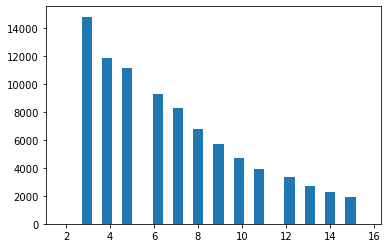

In [140]:
# plot historgram
util.plot_conv_lengths_histogram(conv_lengths, low=mean-std, high=mean+std)

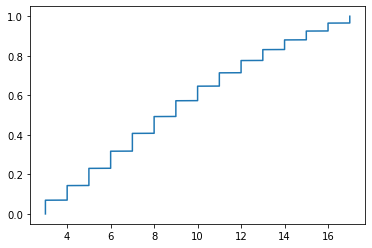

In [141]:
# get a cdf of the conv length distribution
util.plot_conv_lengths_cdf(conv_lengths, low=0, high=17)

## Conversation printing/formatting

In [43]:
# get random conversation from corpus
rand_conv = corpus.random_conversation()

In [30]:
filter_func = lambda utt: utt.speaker.id + ": " + utt.text